In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.optimizers import Adam
from keras.layers import Dense,Activation,Flatten,Input,Dropout,GlobalAveragePooling2D
from keras.models import Model
from keras.utils import np_utils
import random
from matplotlib import image


Using TensorFlow backend.


In [2]:
import os
import cv2

imlist=[]
name=[]
for filename in os.listdir("./images2"):
    folder_path=os.path.join('./images2',filename)
    if os.path.splitext(filename)[1] == '.png' or os.path.splitext(filename)[1] =='.jpeg' or os.path.splitext(filename)[1] =='.jpg':
        name.append(filename.split("_")[0])
        img=cv2.imread(folder_path)
        img = cv2.resize(img, (224,224)) 
        imlist.append(img)
print(imlist[0].shape)

(224, 224, 3)


In [3]:
classes=["airplane","car","person","cat","motorbike","dog","fruit","flower"]

In [4]:
print(name[0])

flower


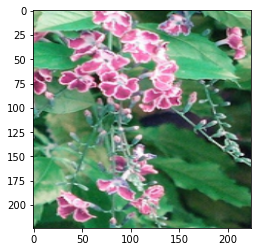

In [5]:
plt.imshow(imlist[0])

In [6]:
y=[]
for i in name:
    y.append(classes.index(i))

In [7]:
y[0]

7

In [8]:
x=np.array(imlist)

In [9]:
x=x/255

In [10]:
x.shape

(459, 224, 224, 3)

In [11]:
model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))

/Users/muskankuchhal/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [12]:
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256,activation='relu')(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(10,activation='softmax')(fc1)

model_new = Model(inputs=model.input, outputs= fc2)

In [13]:
for ix in range(140):
    model_new.layers[ix].trainable = False
    
model_new.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [15]:
x_train.shape

(413, 224, 224, 3)

In [16]:
model_new.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [17]:
hist = model_new.fit(x_train,y_train,
                    shuffle = True,
                    batch_size = 16,
                    epochs = 5,
                    validation_split=0.20
                    )

Train on 330 samples, validate on 83 samples
Epoch 1/5
330/330 [==============================] - 330s 999ms/step - loss: 0.5443 - accuracy: 0.8515 - val_loss: 253.9123 - val_accuracy: 0.1566
Epoch 2/5
330/330 [==============================] - 304s 920ms/step - loss: 0.0728 - accuracy: 0.9727 - val_loss: 87.9799 - val_accuracy: 0.1566
Epoch 3/5
330/330 [==============================] - 304s 920ms/step - loss: 0.1079 - accuracy: 0.9727 - val_loss: 75.6011 - val_accuracy: 0.1566
Epoch 4/5
330/330 [==============================] - 351s 1s/step - loss: 0.0631 - accuracy: 0.9848 - val_loss: 4394.4695 - val_accuracy: 0.1566
Epoch 5/5
330/330 [==============================] - 305s 925ms/step - loss: 0.0620 - accuracy: 0.9848 - val_loss: 225.1284 - val_accuracy: 0.1205


In [21]:
import matplotlib.image as mpimg
img=mpimg.imread('Cropped_image.jpg')

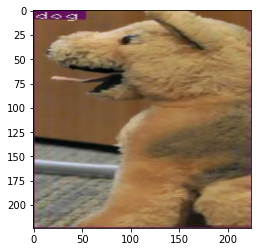

In [24]:
img = cv2.resize(img, (224,224))
plt.imshow(img)

In [28]:
print(img.shape)

(224, 224, 3)


In [30]:
y_pred=model_new.predict(x_test)

In [31]:
y_pred.shape


(46, 10)

In [33]:
image=img.reshape([1,224,224,3])

In [34]:
y_img=model_new.predict(image)
y_img

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [35]:
y_class=np.argmax(y_img) 
y_class

5

In [37]:
print(classes[y_class])

dog
